In [2]:
# libraries to import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import seaborn as sns

In [1]:
"""
When the variance of x is same as y, then the coefficent estimates of X onto Y will be same as Y onto X
"""

'\nWhen the variance of x is same as y, then the coefficent estimates of X onto Y will be same as Y onto X\n'

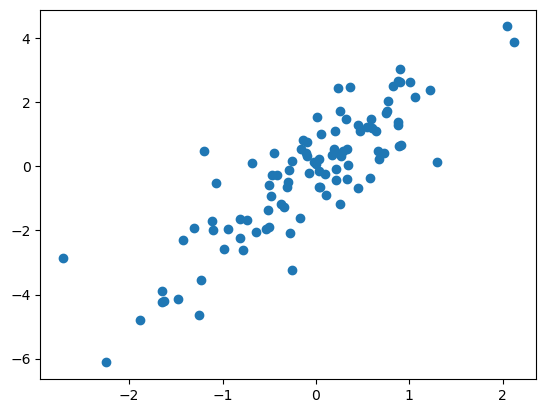

In [4]:
rng = np.random.default_rng(1)
x = rng.normal(size = 100)
y = 2 * x + rng.normal(size = 100)
plt.scatter(x, y);

In [5]:
df = pd.DataFrame({'x': x, 'y':y})
X = MS('x', intercept=False).fit_transform(df)
results = sm.OLS(y, X).fit()
summarize(results)

,coef,std err,t,P>|t|
x,1.9762,0.117,16.898,0.0


In [6]:
Y = MS('y', intercept=False).fit_transform(df)
results = sm.OLS(x, Y).fit()
summarize(results)

,coef,std err,t,P>|t|
y,0.3757,0.022,16.898,0.0


In [ ]:
"""
above 2 are the linear regressions for X & Y, where the coefficients differ when the prediction is Y and when the prediction is X
"""

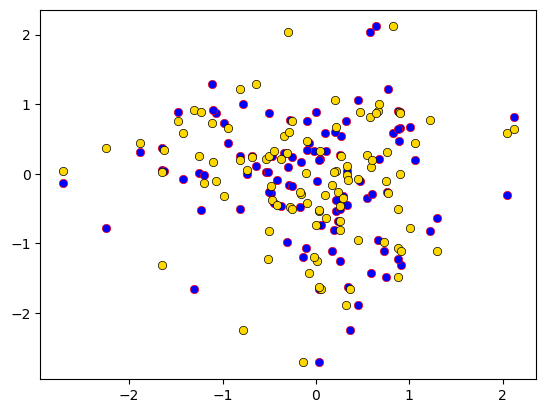

In [7]:
rng = np.random.default_rng(1)
x = rng.normal(size =100)
y = rng.permutation(x)
plt.scatter(x, y,  marker='o', facecolors='blue', edgecolors='red', linewidths=0.5);
plt.scatter(y, x,  marker='o', facecolors='gold', edgecolors='black', linewidths=0.5);

In [17]:
df = pd.DataFrame({'x': x, 'y':y})
X = MS('x', intercept=False).fit_transform(df)
results1 = sm.OLS(y, X).fit()
summarize(results1)

,coef,std err,t,P>|t|
x,-0.0565,0.1,-0.563,0.575


In [15]:
Y = MS('y', intercept=False).fit_transform(df)
results2 = sm.OLS(x, Y).fit()
summarize(results2)

,coef,std err,t,P>|t|
y,-0.0565,0.1,-0.563,0.575


In [ ]:
"""
here y is permutation of x. hence the coefficients are same 
"""

In [18]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.007
Method:                 Least Squares   F-statistic:                             0.3169
Date:                Tue, 03 Feb 2026   Prob (F-statistic):                       0.575
Time:                        19:30:05   Log-Likelihood:                         -126.04
No. Observations:                 100   AIC:                                      254.1
Df Residuals:                      99   BIC:                                      256.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x             -0.0565      0.100     -0.563      0.575      -0.256       0.143
==============================================================================
Omnibus:                        3.948   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                3.298
Skew:                          -0.356   Prob(JB):                        0.192
Kurtosis:                       3.533   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.007
Method:                 Least Squares   F-statistic:                             0.3169
Date:                Tue, 03 Feb 2026   Prob (F-statistic):                       0.575
Time:                        19:30:11   Log-Likelihood:                         -126.04
No. Observations:                 100   AIC:                                      254.1
Df Residuals:                      99   BIC:                                      256.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y             -0.0565      0.100     -0.563      0.575      -0.256       0.143
==============================================================================
Omnibus:                        4.444   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                3.810
Skew:                          -0.384   Prob(JB):                        0.149
Kurtosis:                       3.569   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""